
# <span style="font-size: 36px; font-weight: bold;">Importing Libraries for the project</span>

In [503]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()


# <span style="font-size: 36px; font-weight: bold;">Importing Data</span>

In [504]:
ABCDE_customers = pd.read_csv('DM2425_ABCDEats_DATASET.csv', sep = ',')   #sep is good to seperate data
ABCDE_customers.head(5)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0



# <span style="font-size: 36px; font-weight: bold;">Discovering the lengths of data</span>

In [505]:
ABCDE_customers.shape #Note to self shape without ()

(31888, 56)

# <span style="font-size: 36px; font-weight: bold;">Checking if the data include any footnotes</span>

In [506]:
ABCDE_customers.tail() #we do not have any footnotes

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0



# <span style="font-size: 36px; font-weight: bold;">Getting the names of columns</span>

In [507]:
ABCDE_customers.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

Getting Information about the dataset


# <span style="font-size: 36px; font-weight: bold;">Renaming columns
</span>

In [508]:
ABCDE_customers = ABCDE_customers.rename(columns={
    "DOW_0": "Sunday", 
    "DOW_1": "Monday", 
    "DOW_2": "Tuesday", 
    "DOW_3": "Wednesday", 
    "DOW_4": "Thursday", 
    "DOW_5": "Friday", 
    "DOW_6": "Saturday", 
    "HR_0": "Midnight", 
    "HR_1": "1_AM", 
    "HR_2": "2_AM", 
    "HR_3": "3_AM", 
    "HR_4": "4_AM", 
    "HR_5": "5_AM", 
    "HR_6": "6_AM", 
    "HR_7": "7_AM", 
    "HR_8": "8_AM", 
    "HR_9": "9_AM", 
    "HR_10": "10_AM", 
    "HR_11": "11_AM", 
    "HR_12": "12_PM", 
    "HR_13": "1_PM", 
    "HR_14": "2_PM", 
    "HR_15": "3_PM", 
    "HR_16": "4_PM", 
    "HR_17": "5_PM", 
    "HR_18": "6_PM", 
    "HR_19": "7_PM", 
    "HR_20": "8_PM", 
    "HR_21": "9_PM", 
    "HR_22": "10_PM", 
    "HR_23": "11_PM"
})
#pd.set_option('display.max_columns', None) #to be able too see all columns



# <span style="font-size: 36px; font-weight: bold;">Describing data</span>

In [509]:
ABCDE_customers.info() #Note to self always use info() with ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

Describing the Dataset

In [510]:
ABCDE_customers.describe(include='all') #Note to self always use describe with ()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,2_PM,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM
count,31888,31888,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888,31888,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
unique,31875,9,NaN,NaN,NaN,NaN,NaN,NaN,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,742ca068fc,8670,NaN,NaN,NaN,NaN,NaN,NaN,-,CARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,9761,NaN,NaN,NaN,NaN,NaN,NaN,16748,20161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,NaN,NaN,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,NaN,NaN,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,NaN,NaN,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,NaN,NaN,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# <span style="font-size: 36px; font-weight: bold;">Missing Values</span>

In [511]:
ABCDE_customers.isna().sum() # As we can see here we have a missing values issue that we need to deal with

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
Sunday                         0
Monday                         0
Tuesday                        0
Wednesday                      0
Thursday                       0
Friday    

In [474]:
null_indexes = ABCDE_customers[ABCDE_customers['first_order'].isnull()].index
print(null_indexes.tolist())
#As we can see for first order the null values are consective there must be an underying reason

[]


In [475]:
#We want to know the reason for these missing values
ABCDE_customers.loc[[31781,31782,31783,31784,31785,31781,31782,31783,31784,31785]]



,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
31781,d7c7face7e,2440,26.0,1,1,1,90.0,90,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,ERROR
31782,0366fbb035,8670,24.0,1,1,0,0.0,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,1
31783,039d7c8a20,4660,23.0,1,1,0,0.0,0,DELIVERY,DIGI,...,0,1,0,0,0,0,0,0,0,1
31784,04c9d25c93,8670,27.0,1,1,1,0.0,0,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,1
31785,09118ae9e7,8670,36.0,1,1,0,0.0,0,-,CARD,...,0,0,0,0,0,0,0,0,0,1
31781,d7c7face7e,2440,26.0,1,1,1,90.0,90,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,ERROR
31782,0366fbb035,8670,24.0,1,1,0,0.0,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,1
31783,039d7c8a20,4660,23.0,1,1,0,0.0,0,DELIVERY,DIGI,...,0,1,0,0,0,0,0,0,0,1
31784,04c9d25c93,8670,27.0,1,1,1,0.0,0,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,1
31785,09118ae9e7,8670,36.0,1,1,0,0.0,0,-,CARD,...,0,0,0,0,0,0,0,0,0,1


In [476]:
ABCDE_customers.loc[ABCDE_customers['last_order'] == 0 ] #We notice that we have these null values in first_order when the last_order= 0 ; 
#possible interpretation: these are new customers that placed orders right at the start of the dataset tracking period we can also notice that these customers all placed order on
#dow6 Which further indicate this assumption
#so we can impute the values as 0 since the last order was on first day of the analysis so it should be also their first day

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
31782,0366fbb035,8670,24.0,1,1,0,0.0,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,1
31783,039d7c8a20,4660,23.0,1,1,0,0.0,0,DELIVERY,DIGI,...,0,1,0,0,0,0,0,0,0,1
31784,04c9d25c93,8670,27.0,1,1,1,0.0,0,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,1
31785,09118ae9e7,8670,36.0,1,1,0,0.0,0,-,CARD,...,0,0,0,0,0,0,0,0,0,1
31786,0d1f298bbd,4660,22.0,1,1,1,0.0,0,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30.0,1,1,1,0.0,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,1
31884,f6b6709018,8670,NaN,1,1,0,0.0,0,DELIVERY,DIGI,...,0,1,0,0,0,0,0,0,0,1
31885,f74ad8ce3f,8670,24.0,1,1,1,0.0,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,1
31886,f7b19c0241,8670,34.0,1,1,0,0.0,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,1


In [477]:
#Imputing value by 0
ABCDE_customers['first_order'] = ABCDE_customers['first_order'].fillna(0)

In [478]:
ABCDE_customers.isna().sum() #Checking now I nolonger have nulls in first_order now we move to customer age

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                    0
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
Sunday                         0
Monday                         0
Tuesday                        0
Wednesday                      0
Thursday                       0
Friday    

In [479]:
null_indexes = ABCDE_customers[ABCDE_customers['customer_age'].isnull()].index
print(null_indexes.tolist()) #there's no pattern detected #here either we delete data or impute ages of similar clients in tems of buying

[3, 27, 37, 69, 73, 78, 90, 96, 100, 153, 196, 220, 237, 250, 296, 309, 312, 396, 528, 546, 632, 663, 686, 736, 762, 867, 936, 949, 958, 971, 1089, 1177, 1179, 1188, 1201, 1217, 1221, 1281, 1322, 1333, 1337, 1350, 1355, 1402, 1409, 1432, 1434, 1531, 1552, 1568, 1609, 1639, 1675, 1775, 1831, 1890, 1902, 1926, 1967, 1991, 2021, 2086, 2090, 2146, 2155, 2164, 2211, 2225, 2227, 2323, 2338, 2413, 2439, 2596, 2608, 2664, 2668, 2705, 2783, 2821, 2858, 2888, 3021, 3031, 3086, 3115, 3309, 3328, 3357, 3383, 3384, 3409, 3417, 3480, 3596, 3600, 3632, 3691, 3759, 3807, 3858, 3876, 3893, 3928, 3950, 3958, 3977, 3997, 4004, 4061, 4108, 4149, 4162, 4395, 4441, 4495, 4547, 4555, 4556, 4578, 4634, 4664, 4666, 4799, 4811, 4832, 4852, 4893, 4991, 5007, 5056, 5057, 5101, 5140, 5167, 5206, 5251, 5364, 5429, 5449, 5490, 5638, 5690, 5713, 5754, 5794, 5797, 5836, 5844, 5905, 5985, 6004, 6010, 6030, 6031, 6126, 6329, 6404, 6418, 6487, 6542, 6558, 6566, 6602, 6657, 6680, 6690, 6718, 6738, 6744, 6805, 6836, 6882, 

In [480]:
#for now i will fill the customer age with 0 but this will be only a temporary solution
ABCDE_customers['customer_age'] = ABCDE_customers['customer_age'].fillna(0) #Temporary 

In [481]:
ABCDE_customers.loc[ABCDE_customers['Midnight'].isna()]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
34,ae38da6386,8670,21.0,2,3,1,0.0,7,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,ERROR
87,a21a839c77,4140,19.0,1,4,4,0.0,21,-,CARD,...,0,0,0,0,1,0,0,1,0,ERROR
121,9237d23413,8670,22.0,3,4,2,0.0,27,-,CARD,...,0,0,0,0,0,0,0,0,0,ERROR
132,8c6ffd7357,4660,25.0,3,4,1,0.0,28,-,CARD,...,1,0,0,0,0,0,0,0,0,ERROR
186,67c6c9f9c4,4660,24.0,1,3,0,0.0,36,FREEBIE,DIGI,...,0,0,0,0,0,0,1,0,0,ERROR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31298,37b72b449d,2360,23.0,1,4,0,85.0,85,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,ERROR
31549,ac382ddfd1,-,28.0,1,2,2,87.0,89,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,1,ERROR
31615,96f1fc25e3,8670,25.0,2,2,1,88.0,88,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,ERROR
31781,d7c7face7e,2440,26.0,1,1,1,90.0,90,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,ERROR


In [482]:
ABCDE_customers['Midnight'].unique() #In order to fill this variable we need to check how many orders during the days and compare them with the number of orders during the hous

array([ 0., nan])

In [483]:
#Initially We replace the values of midnight by 0 for the sake of analysis
ABCDE_customers['Midnight'] = ABCDE_customers['Midnight'].fillna(0)

In [484]:
ABCDE_customers['Midnight'].unique()

array([0.])

In [485]:
# We created a new coljumn in the dataframe that will have the number of orders, the purpose of this code is to check if the sum of hours = som of weekdays
weekly_orders =[]
for i, row in ABCDE_customers.iterrows():
    sum_weekly = (row["Monday"]+row["Tuesday"]+row["Wednesday"]+row["Thursday"]+row["Friday"]+row["Saturday"]+row["Sunday"])
    sum_hours = (row["Midnight"]+row["1_AM"]+row["2_AM"]+row["3_AM"]+row["4_AM"]+row["5_AM"]+row["6_AM"]+row["7_AM"]+row["8_AM"]+row["9_AM"]+row["10_AM"]+row["11_AM"]+row["12_PM"] +row["1_PM"]+row["2_PM"]+row["3_PM"]+row["4_PM"]+row["5_PM"]+row["6_PM"]+row["7_PM"]+row["8_PM"]+row["9_PM"]+row["10_PM"]+row["11_PM"])
    if sum_weekly==sum_hours:
        weekly_orders.append(sum_weekly)
    else:
         weekly_orders.append("ERROR")
ABCDE_customers['number_orders'] = weekly_orders



ABCDE_customers.head(35)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,2,0,0,0,0,0,2
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,2
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,2
3,180c632ed8,4660,0.0,2,3,1,0.0,2,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,2
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,2
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,2
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,...,0,0,1,0,0,0,0,0,0,2
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,...,1,0,0,0,0,0,0,0,0,2
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,...,0,0,1,0,1,0,0,0,1,3
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,2


In [486]:
ABCDE_customers[ABCDE_customers['number_orders'] == "ERROR"] #as we can see here the total number of errors is the same as the missing values in midnight


,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
34,ae38da6386,8670,21.0,2,3,1,0.0,7,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,ERROR
87,a21a839c77,4140,19.0,1,4,4,0.0,21,-,CARD,...,0,0,0,0,1,0,0,1,0,ERROR
121,9237d23413,8670,22.0,3,4,2,0.0,27,-,CARD,...,0,0,0,0,0,0,0,0,0,ERROR
132,8c6ffd7357,4660,25.0,3,4,1,0.0,28,-,CARD,...,1,0,0,0,0,0,0,0,0,ERROR
186,67c6c9f9c4,4660,24.0,1,3,0,0.0,36,FREEBIE,DIGI,...,0,0,0,0,0,0,1,0,0,ERROR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31298,37b72b449d,2360,23.0,1,4,0,85.0,85,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,ERROR
31549,ac382ddfd1,-,28.0,1,2,2,87.0,89,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,1,ERROR
31615,96f1fc25e3,8670,25.0,2,2,1,88.0,88,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,ERROR
31781,d7c7face7e,2440,26.0,1,1,1,90.0,90,DELIVERY,CASH,...,0,0,0,0,0,0,0,0,0,ERROR


In [487]:
#so now what we are going to do is fill this NaN with the appropriate values
for i, row in ABCDE_customers.iterrows():
    sum_weekly = (row["Monday"]+row["Tuesday"]+row["Wednesday"]+row["Thursday"]+row["Friday"]+row["Saturday"]+row["Sunday"])
    sum_hours = (row["Midnight"]+row["1_AM"]+row["2_AM"]+row["3_AM"]+row["4_AM"]+row["5_AM"]+row["6_AM"]+row["7_AM"]+row["8_AM"]+row["9_AM"]+row["10_AM"]+row["11_AM"]+row["12_PM"] +row["1_PM"]+row["2_PM"]+row["3_PM"]+row["4_PM"]+row["5_PM"]+row["6_PM"]+row["7_PM"]+row["8_PM"]+row["9_PM"]+row["10_PM"]+row["11_PM"])
    if row['number_orders'] == "ERROR":
        ABCDE_customers.loc[i, 'Midnight'] = sum_weekly-sum_hours

ABCDE_customers['Midnight'].head(35)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    1.0
Name: Midnight, dtype: float64

In [491]:
#updating the value of error:
weekly_orders =[]
for i, row in ABCDE_customers.iterrows():
    sum_weekly = (row["Monday"]+row["Tuesday"]+row["Wednesday"]+row["Thursday"]+row["Friday"]+row["Saturday"]+row["Sunday"])
    sum_hours = (row["Midnight"]+row["1_AM"]+row["2_AM"]+row["3_AM"]+row["4_AM"]+row["5_AM"]+row["6_AM"]+row["7_AM"]+row["8_AM"]+row["9_AM"]+row["10_AM"]+row["11_AM"]+row["12_PM"] +row["1_PM"]+row["2_PM"]+row["3_PM"]+row["4_PM"]+row["5_PM"]+row["6_PM"]+row["7_PM"]+row["8_PM"]+row["9_PM"]+row["10_PM"]+row["11_PM"])
    if sum_weekly==sum_hours:
        weekly_orders.append(sum_weekly)
   
ABCDE_customers['number_orders'] = weekly_orders



ABCDE_customers.head(35)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,2,0,0,0,0,0,2
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,2
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,2
3,180c632ed8,4660,0.0,2,3,1,0.0,2,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,2
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,2
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,2
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,...,0,0,1,0,0,0,0,0,0,2
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,...,1,0,0,0,0,0,0,0,0,2
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,...,0,0,1,0,1,0,0,0,1,3
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,2


In [489]:
#checking the values of the new column:
ABCDE_customers['number_orders'].unique()

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1,  0, 29, 51, 53, 65, 45, 91, 50, 75,
       49, 48, 80, 59], dtype=int64)

In [490]:
#checking the values of the lidnight column:
ABCDE_customers['Midnight'].unique()

array([ 0.,  1.,  2.,  3.,  5.,  4., 12.,  9.,  8.,  7.,  6., 11., 15.])

# <span style="font-size: 36px; font-weight: bold;">Duplicates</span>

In [427]:
ABCDE_customers.duplicated().sum()

13

In [428]:
ABCDE_customers[ABCDE_customers['customer_id'].duplicated()==1]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,10
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,1,0,1,0,0,0,0,0,0,5
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,1,0,1,0,0,0,0,4
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,1
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,2
24827,6bbf5f74cd,8550,22.0,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,16
25793,8aa9bbc147,8550,24.0,2,4,2,53.0,59,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,2
27515,cf563a0a98,8550,27.0,2,2,0,61.0,62,FREEBIE,CASH,...,0,0,0,0,0,0,0,0,0,2
27739,201a13a34d,8550,28.0,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,1,2
28713,06018a56be,8550,27.0,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,2


In [429]:
ABCDE_customers[ABCDE_customers['customer_id'].isin(["b55012ee1c","24251eb7da","671bf0c738","742ca068fc","df91183978","6bbf5f74cd","8aa9bbc147","cf563a0a98","201a13a34d","06018a56be","fac7984c0d","b8e7a643a4","cc08ef25ce"])]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
3355,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,10
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,10
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,1,0,1,0,0,0,0,0,0,5
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,1,0,1,0,0,0,0,0,0,5
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,1,0,1,0,0,0,0,4
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,1,0,1,0,0,0,0,4
20855,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,1
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,1
24328,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,2
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,2


In [430]:
ABCDE_customers=ABCDE_customers.drop_duplicates() #here we dropped the duplicates

In [431]:
#recheck if all duplicates were dropped
ABCDE_customers.duplicated().sum()

0

# <span style="font-size: 36px; font-weight: bold;">Changing the data types</span>

In [432]:
ABCDE_customers.dtypes #we have to fix midnight,customer_age,first_order from float t ingt

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
Sunday                        int64
Monday                        int64
Tuesday                     

In [497]:
ABCDE_customers=ABCDE_customers.astype({'first_order': 'int', 'customer_age': 'int','Midnight':'int'})

In [498]:
ABCDE_customers["customer_region"]=ABCDE_customers["customer_region"].replace("-","9999")

In [499]:
ABCDE_customers["customer_region"].unique()

array(['2360', '8670', '4660', '2440', '9999', '4140', '2490', '8370',
       '8550'], dtype=object)

In [500]:
ABCDE_customers=ABCDE_customers.astype({'customer_region': 'int'})

In [502]:
ABCDE_customers.dtypes #checking

customer_id                  object
customer_region               int32
customer_age                  int32
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                   int32
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
Sunday                        int64
Monday                        int64
Tuesday                     

# <span style="font-size: 36px; font-weight: bold;">Interpreting data</span>

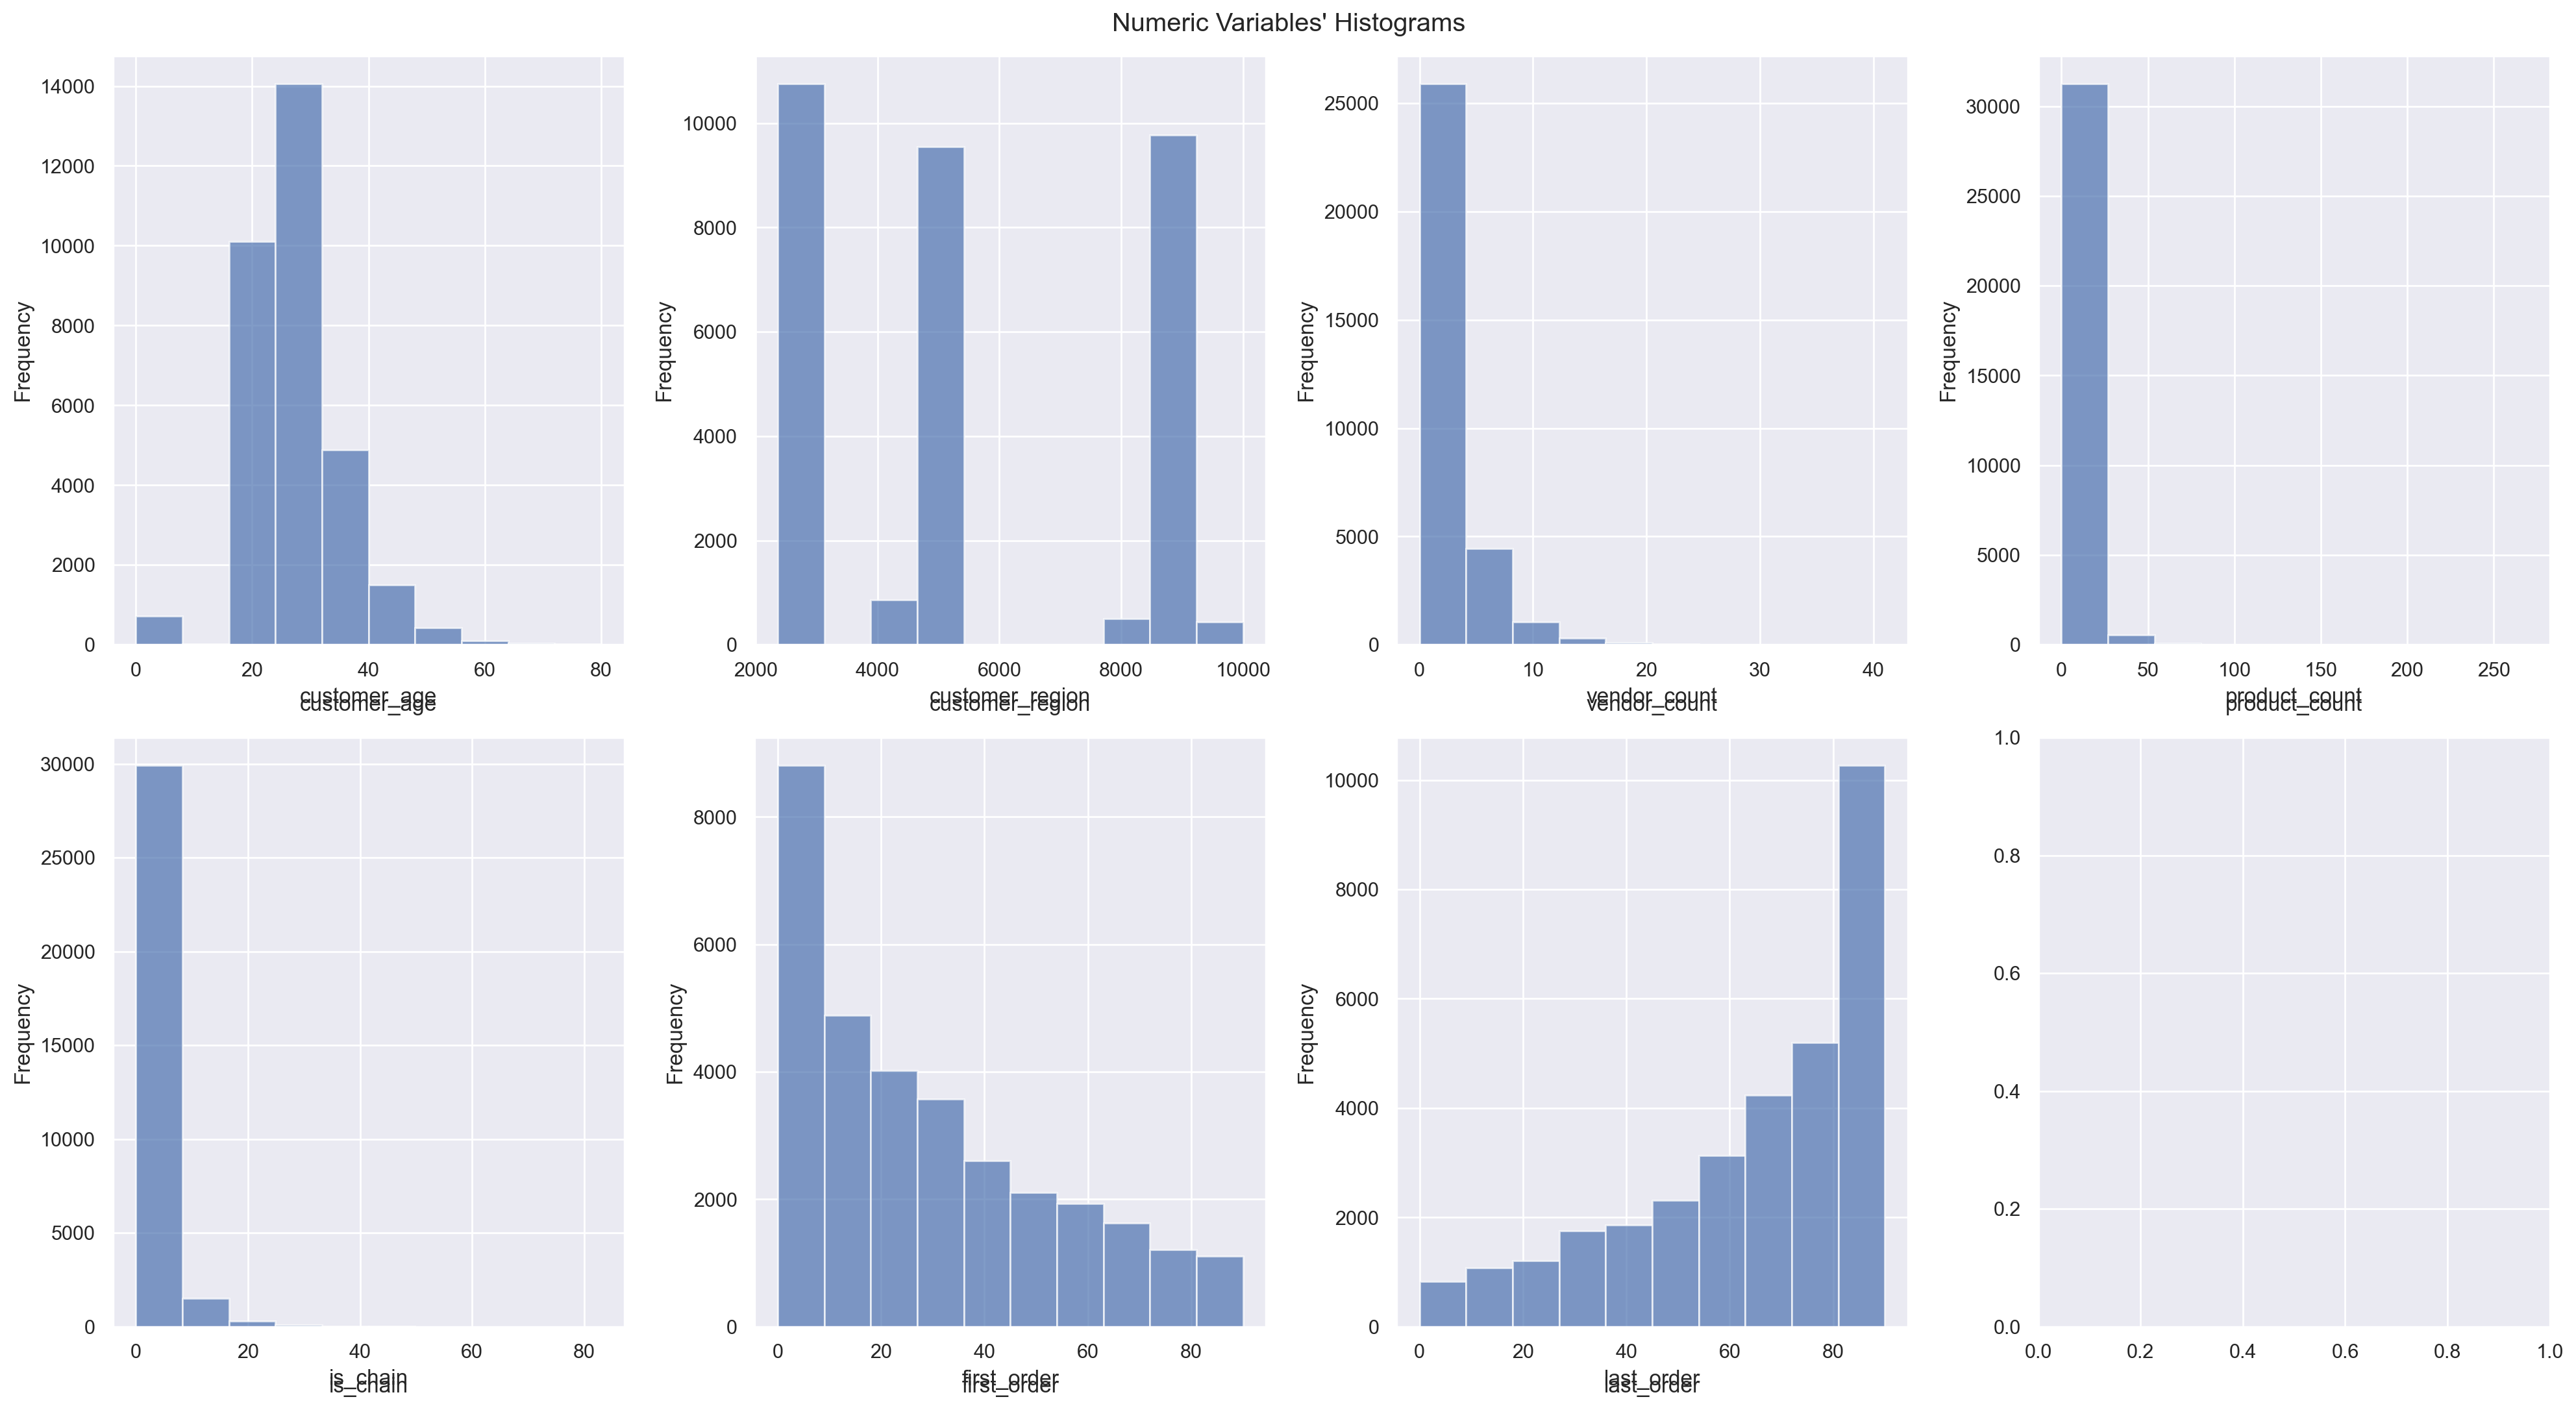

In [444]:

# Define important features
important_features = ["customer_age", "customer_region", "vendor_count", "product_count", "is_chain", "first_order", "last_order"]

# Create a DataFrame with only the important features
important_features_df = ABCDE_customers[important_features]

# Get metric features (only numeric columns)
metric_features = important_features_df.select_dtypes(include='number').columns.tolist()

# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(ABCDE_customers[feat], bins=10, alpha=0.7)  # Adjust bins and transparency
    ax.set_title(feat, y=-0.13)
    ax.set_xlabel(feat)
    ax.set_ylabel('Frequency')

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"
plt.suptitle(title)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [446]:
ABCDE_customers.describe(include='all')

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,3_PM,4_PM,5_PM,6_PM,7_PM,8_PM,9_PM,10_PM,11_PM,number_orders
count,31875,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875,31875,...,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
unique,31875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1b8f824d5e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,CARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16744,20153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5236.571545,26.880157,3.102714,5.668424,2.819357,28.375247,63.672376,NaN,NaN,...,0.277114,0.356580,0.391059,0.337098,0.245678,0.142871,0.071184,0.048282,0.045176,4.369035
std,NaN,2640.968424,8.184541,2.771753,6.957933,3.977977,24.120266,23.227992,NaN,NaN,...,0.738282,0.874598,0.943873,0.894106,0.795433,0.586641,0.348604,0.298324,0.282011,5.084780
min,NaN,2360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2360.000000,22.000000,1.000000,2.000000,1.000000,7.000000,49.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,NaN,4660.000000,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,NaN,8670.000000,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
